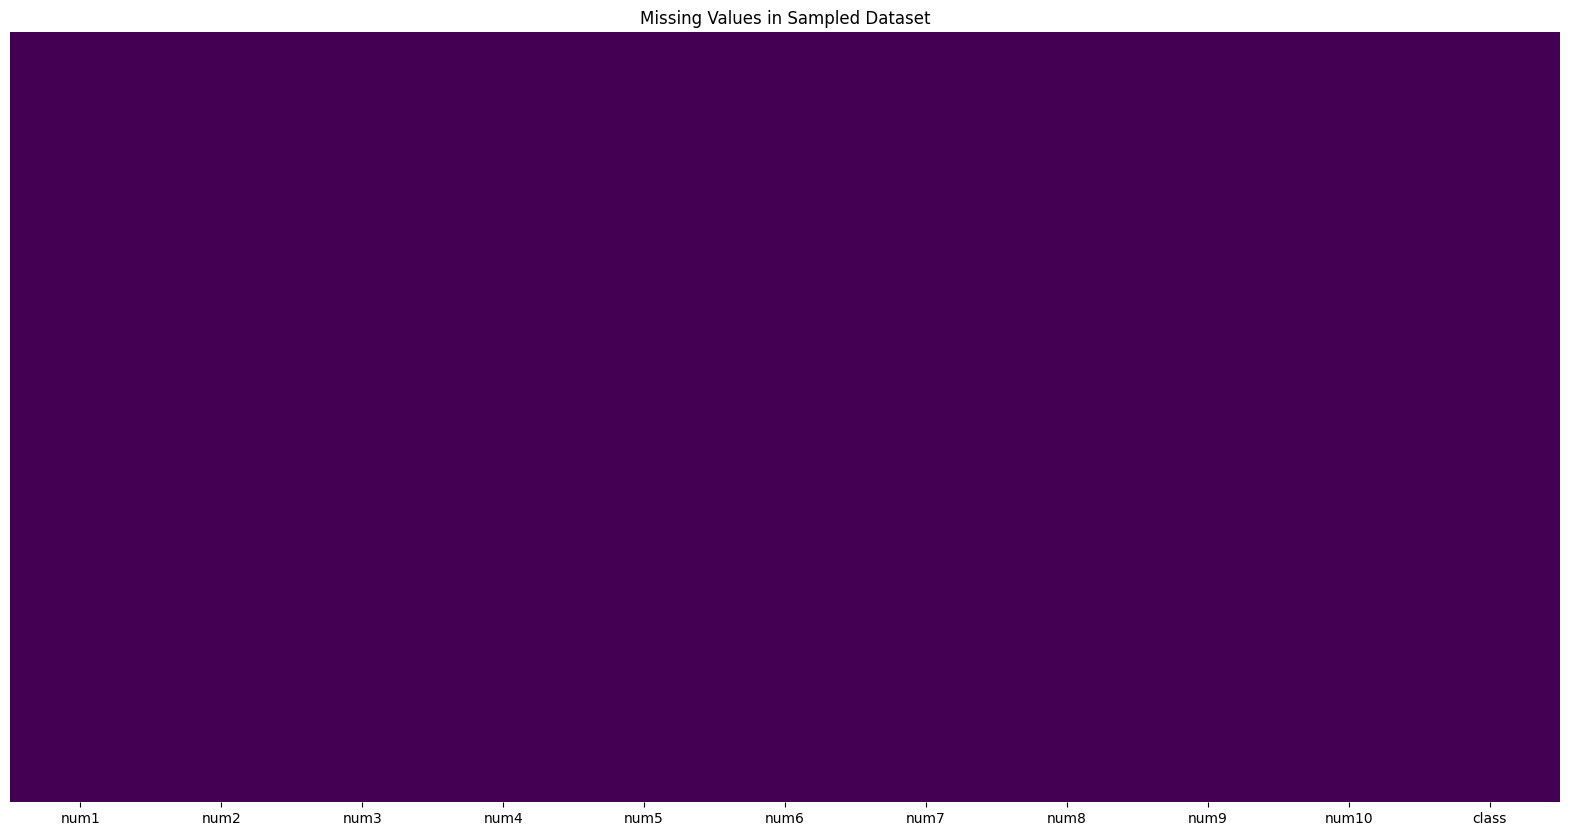

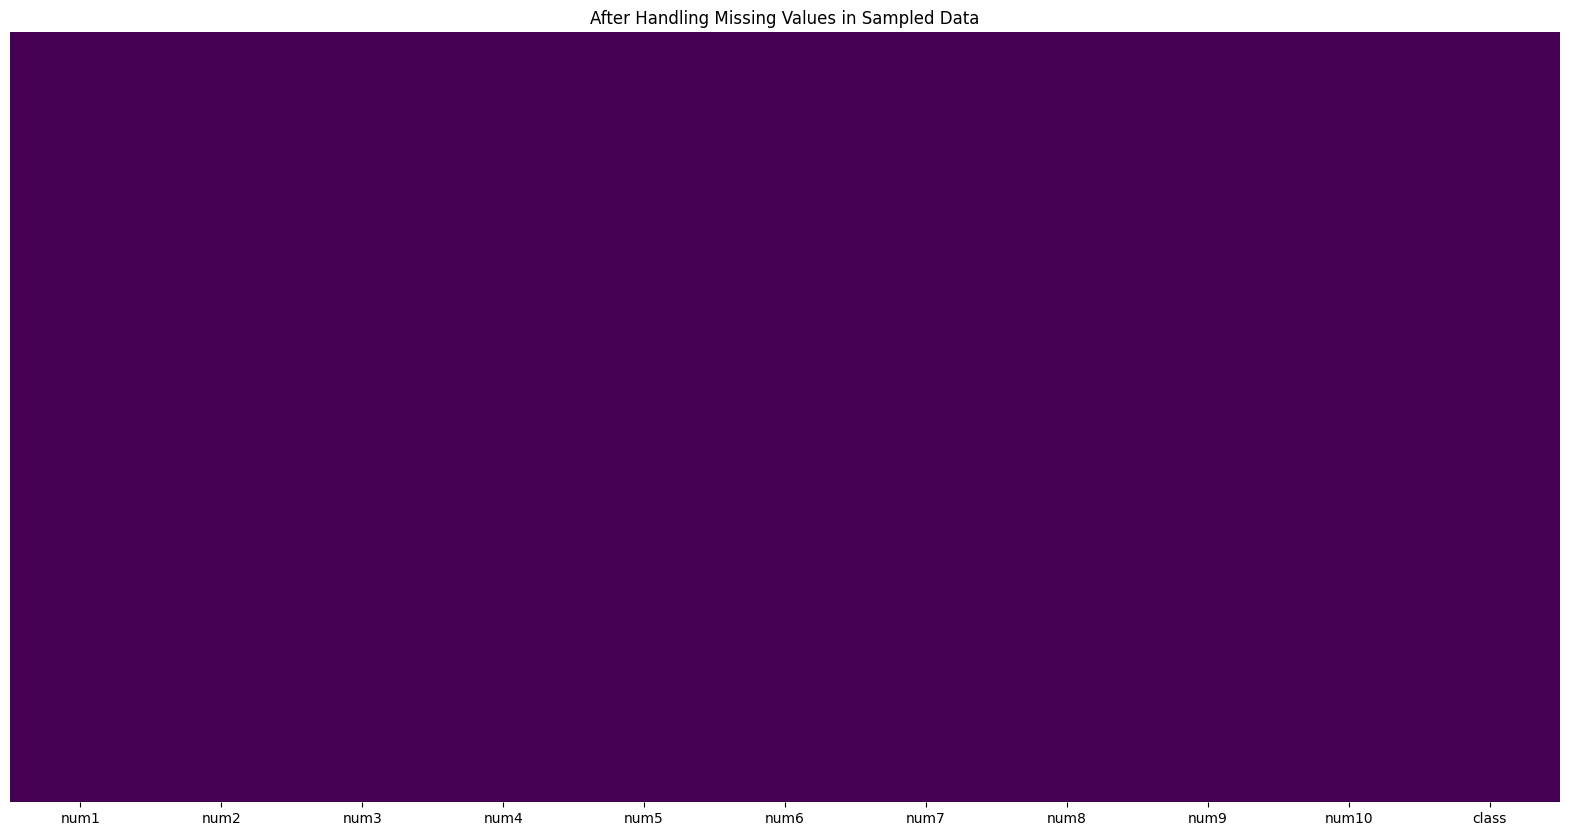

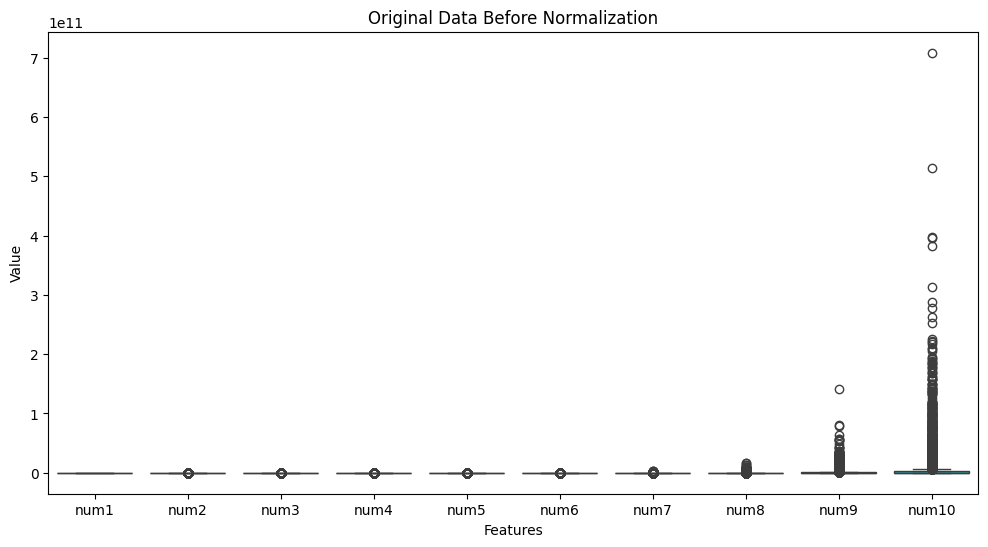

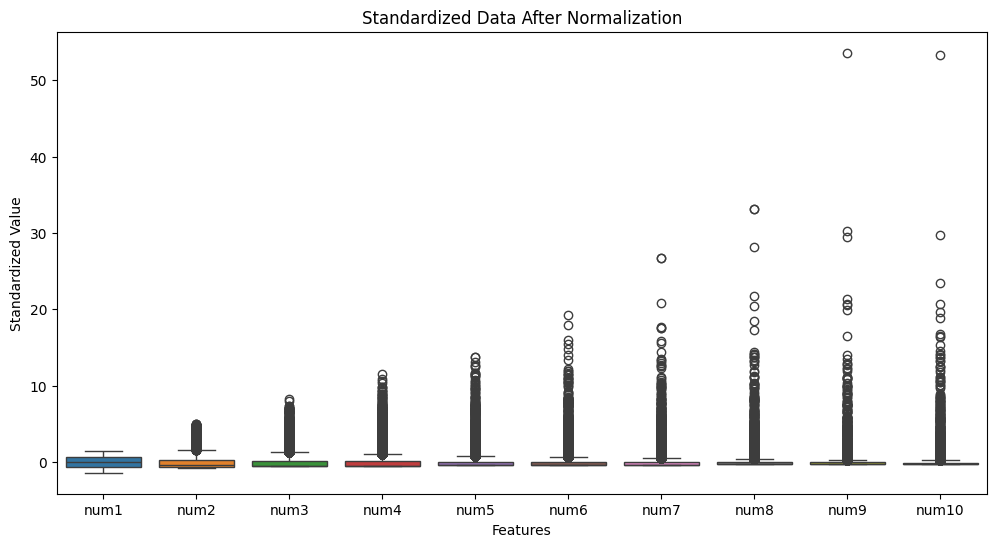

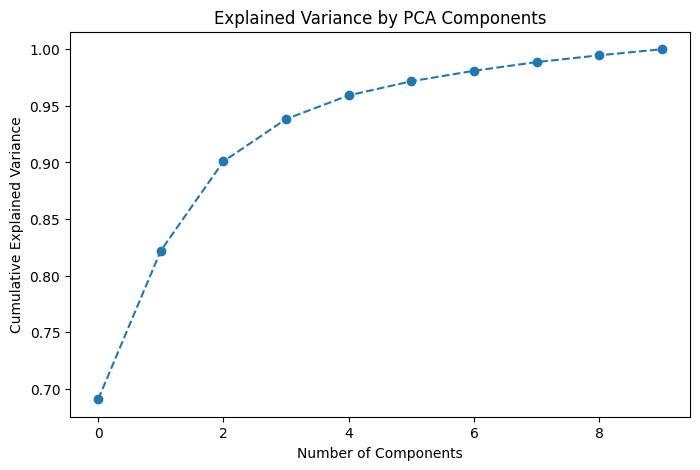

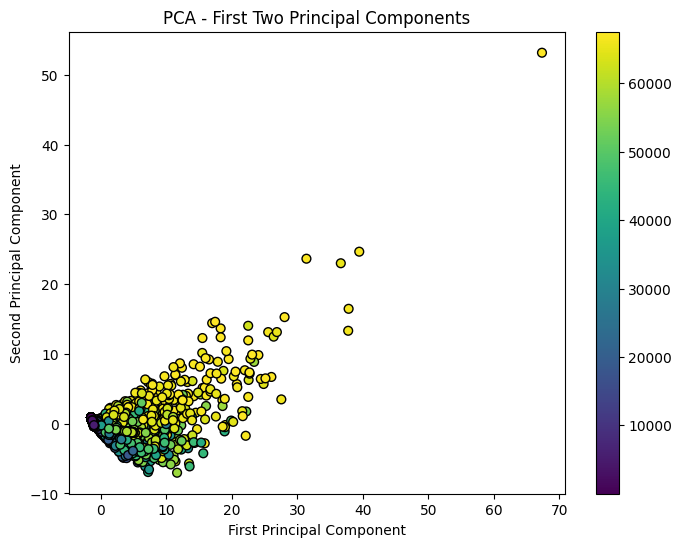

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define relative path to the dataset
data_path = './4_Classification of Robots from their conversation sequence_Set2.csv'

# Define directory for saving plots
plot_dir = './TestingPlots'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Define file paths for saving plots
missing_values_before_path = os.path.join(plot_dir, 'missing_values_before.png')
missing_values_after_path = os.path.join(plot_dir, 'missing_values_after.png')
missing_values_rows_path = os.path.join(plot_dir, 'missing_values_rows.png')
original_data_before_norm_path = os.path.join(plot_dir, 'original_data_before_norm.png')
standardized_data_after_norm_path = os.path.join(plot_dir, 'standardized_data_after_norm.png')
explained_variance_path = os.path.join(plot_dir, 'explained_variance.png')
pca_projection_path = os.path.join(plot_dir, 'pca_projection.png')

# Load dataset and skip the first row
df = pd.read_csv(data_path, header=None, skiprows=1)

# Assign column names
col_names = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'num9', 'num10', 'class']
df.columns = col_names

# Convert numerical columns to float and handle errors
for col in col_names[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Encode target class as categorical integer labels
df['class'] = pd.Categorical(df['class']).codes

# Sample the data to reduce size for quicker processing (1% subset)
df_sample = df.sample(frac=0.1, random_state=42)

# Plot original data (before handling missing values) on the sampled data
plt.figure(figsize=(20, 10))
sns.heatmap(df_sample.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Sampled Dataset')
plt.savefig(missing_values_before_path)
#plt.show()

# Save rows with missing values for further analysis
df_missing = df_sample[df_sample.isnull().any(axis=1)]

if not df_missing.empty:
    # Plot rows with missing values from the sampled data
    plt.figure(figsize=(20, 10))
    sns.heatmap(df_missing.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Rows with Missing Values in Sampled Data')
    plt.savefig(missing_values_rows_path)
    # plt.show()

# Handle missing data by removing rows with any NaN values in the sampled data
df_sample.dropna(inplace=True)

# Plot data after handling missing values in the sampled data
plt.figure(figsize=(20, 10))
sns.heatmap(df_sample.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('After Handling Missing Values in Sampled Data')
plt.savefig(missing_values_after_path)
# plt.show()

# Split dataset into features and target variable
X = df_sample.drop('class', axis=1).values
y = df_sample['class'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Plot original data before normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sample.iloc[:, :-1])
plt.title('Original Data Before Normalization')
plt.xlabel('Features')
plt.ylabel('Value')
plt.savefig(original_data_before_norm_path)
# plt.show()

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=col_names[:-1])

# Plot standardized data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled_df)
plt.title('Standardized Data After Normalization')
plt.xlabel('Features')
plt.ylabel('Standardized Value')
plt.savefig(standardized_data_after_norm_path)
# plt.show()

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.savefig(explained_variance_path)
# plt.show()

# Plot first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Principal Components')
plt.colorbar()
plt.savefig(pca_projection_path)
# plt.show()
